In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df1 = pd.read_csv(r"C:\Users\hplap\Downloads\Itvedant\python\ML Project\creditcard (1).csv")

In [25]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df1.shape

(284807, 31)

In [27]:
df = df1.sample(10000)

In [28]:
df.shape

(10000, 31)

In [29]:
df.duplicated().sum()

3

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
X = df.drop('Class', axis=1)
Y = df['Class']

# imbalanced data

# Class
# 0    9978
# 1      22
# Name: count, dtype: int64

In [33]:
df['Class'].value_counts()     

Class
0    9981
1      16
Name: count, dtype: int64

In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
ROS = RandomOverSampler()

In [61]:
x_resp, y_resp = ROS.fit_resample(X, Y)

# Balanced data

# Class
# 0    9972
# 1    9972
# Name: count, dtype: int64

In [62]:
y_resp.value_counts()

Class
0    9981
1    9981
Name: count, dtype: int64

In [38]:
import seaborn as sns


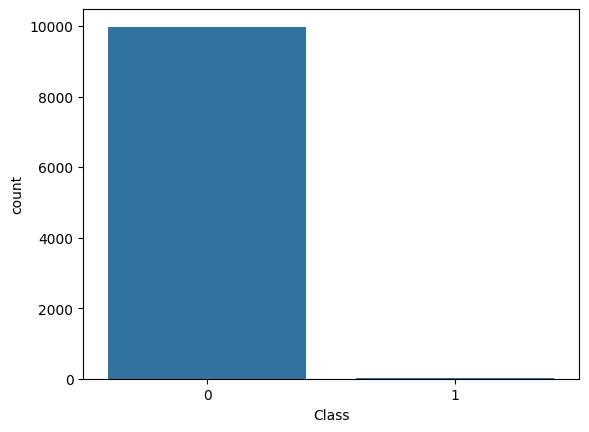

In [39]:
sns.countplot(df,x="Class")
plt.show()

In [40]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_resp, y_resp, test_size=0.20, random_state=42)

In [66]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(15969, 30) (3993, 30)
(15969,) (3993,)


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [43]:
LGR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ADBC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
XGC = XGBRFClassifier()
KNN = KNeighborsClassifier()
SVM = SVC()

In [44]:
import warnings
warnings.filterwarnings("ignore")

In [45]:
LGR.fit(x_train, y_train)

LogisticRegression()

In [46]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
RF.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
ADBC.fit(x_train, y_train)

AdaBoostClassifier()

In [49]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [50]:
XGC.fit(x_train,y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [51]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
SVM.fit(x_train, y_train)

SVC()

In [53]:
y_pred_LGR = LGR.predict(x_test)
y_pred_DT = DT.predict(x_test)
y_pred_RF = RF.predict(x_test)
y_pred_ADBC = ADBC.predict(x_test)
y_pred_GBC = GBC.predict(x_test)
y_pred_XGC = XGC.predict(x_test)
y_pred_KNN = KNN.predict(x_test)
y_pred_SVM = SVM.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("Accuracy_Score Logistic Model:", accuracy_score(y_test, y_pred_LGR))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Decision Tree Model :", accuracy_score(y_test, y_pred_DT))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Random Forest Model :", accuracy_score(y_test, y_pred_RF))
print("\n--------------------------------------------------------------")
print("Accuracy_Score Adaboost Model :", accuracy_score(y_test, y_pred_ADBC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score GradientBoost Model :", accuracy_score(y_test, y_pred_GBC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score XGBoost Model :", accuracy_score(y_test, y_pred_XGC))
print("\n--------------------------------------------------------------")
print("Accuracy_Score KNN Model :", accuracy_score(y_test, y_pred_KNN))
print("\n--------------------------------------------------------------")
print("Accuracy_Score SVM Model :", accuracy_score(y_test, y_pred_SVM))

Accuracy_Score Logistic Model: 0.986977210117706

--------------------------------------------------------------
Accuracy_Score Decision Tree Model : 0.9997495617330328

--------------------------------------------------------------
Accuracy_Score Random Forest Model : 1.0

--------------------------------------------------------------
Accuracy_Score Adaboost Model : 1.0

--------------------------------------------------------------
Accuracy_Score GradientBoost Model : 0.9997495617330328

--------------------------------------------------------------
Accuracy_Score XGBoost Model : 0.9984973703981969

--------------------------------------------------------------
Accuracy_Score KNN Model : 0.9962434259954921

--------------------------------------------------------------
Accuracy_Score SVM Model : 0.5730027548209367


In [56]:
L = [[284,-0.942623062836132,0.657317958481619,1.19154438444274,1.32649709537444,0.976744980417237,-0.832970031959888,0.238932867962981,0.163401502866342,-0.584980704195827,-0.78963933406533,-0.144501037430694,-1.44516103856932,-2.11588511176142,-0.617131929386945,1.96683731648052,-0.203704313588247,1.50069170194145,0.586786086504707,0.271466390269338,0.115262873126789,0.0621654394810816,-0.0160764862302391,-0.236314329098232,-0.0828019702798573,0.357494184001844,-0.110529973085748,0.0807957182211791,0.113264047958142,1]]
XGC.predict(L)

array([0])

In [57]:
import pickle

In [58]:
with open('Machine.pkl', 'wb') as file:
    pickle.dump(XGC, file)

In [59]:
4462,-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,-0.238253368,-1.525411627,2.032912158,-6.560124295,0.022937323,-1.470101536,-0.698826069,-2.282193829,-4.781830856,-2.615664945,-1.334441067,-0.430021867,-0.294166318,-0.932391057,0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797,239.93


(4462,
 -2.303349568,
 1.75924746,
 -0.359744743,
 2.330243051,
 -0.821628328,
 -0.075787571,
 0.562319782,
 -0.399146578,
 -0.238253368,
 -1.525411627,
 2.032912158,
 -6.560124295,
 0.022937323,
 -1.470101536,
 -0.698826069,
 -2.282193829,
 -4.781830856,
 -2.615664945,
 -1.334441067,
 -0.430021867,
 -0.294166318,
 -0.932391057,
 0.172726296,
 -0.087329538,
 -0.156114265,
 -0.542627889,
 0.039565989,
 -0.153028797,
 239.93)

In [60]:
L = [[4462,-2.303349568,1.75924746,-0.359744743,2.330243051,-0.821628328,-0.075787571,0.562319782,-0.399146578,-0.238253368,-1.525411627,2.032912158,-6.560124295,0.022937323,-1.470101536,-0.698826069,-2.282193829,-4.781830856,-2.615664945,-1.334441067,-0.430021867,-0.294166318,-0.932391057,0.172726296,-0.087329538,-0.156114265,-0.542627889,0.039565989,-0.153028797,239.93]]
XGC.predict(L)

array([0])